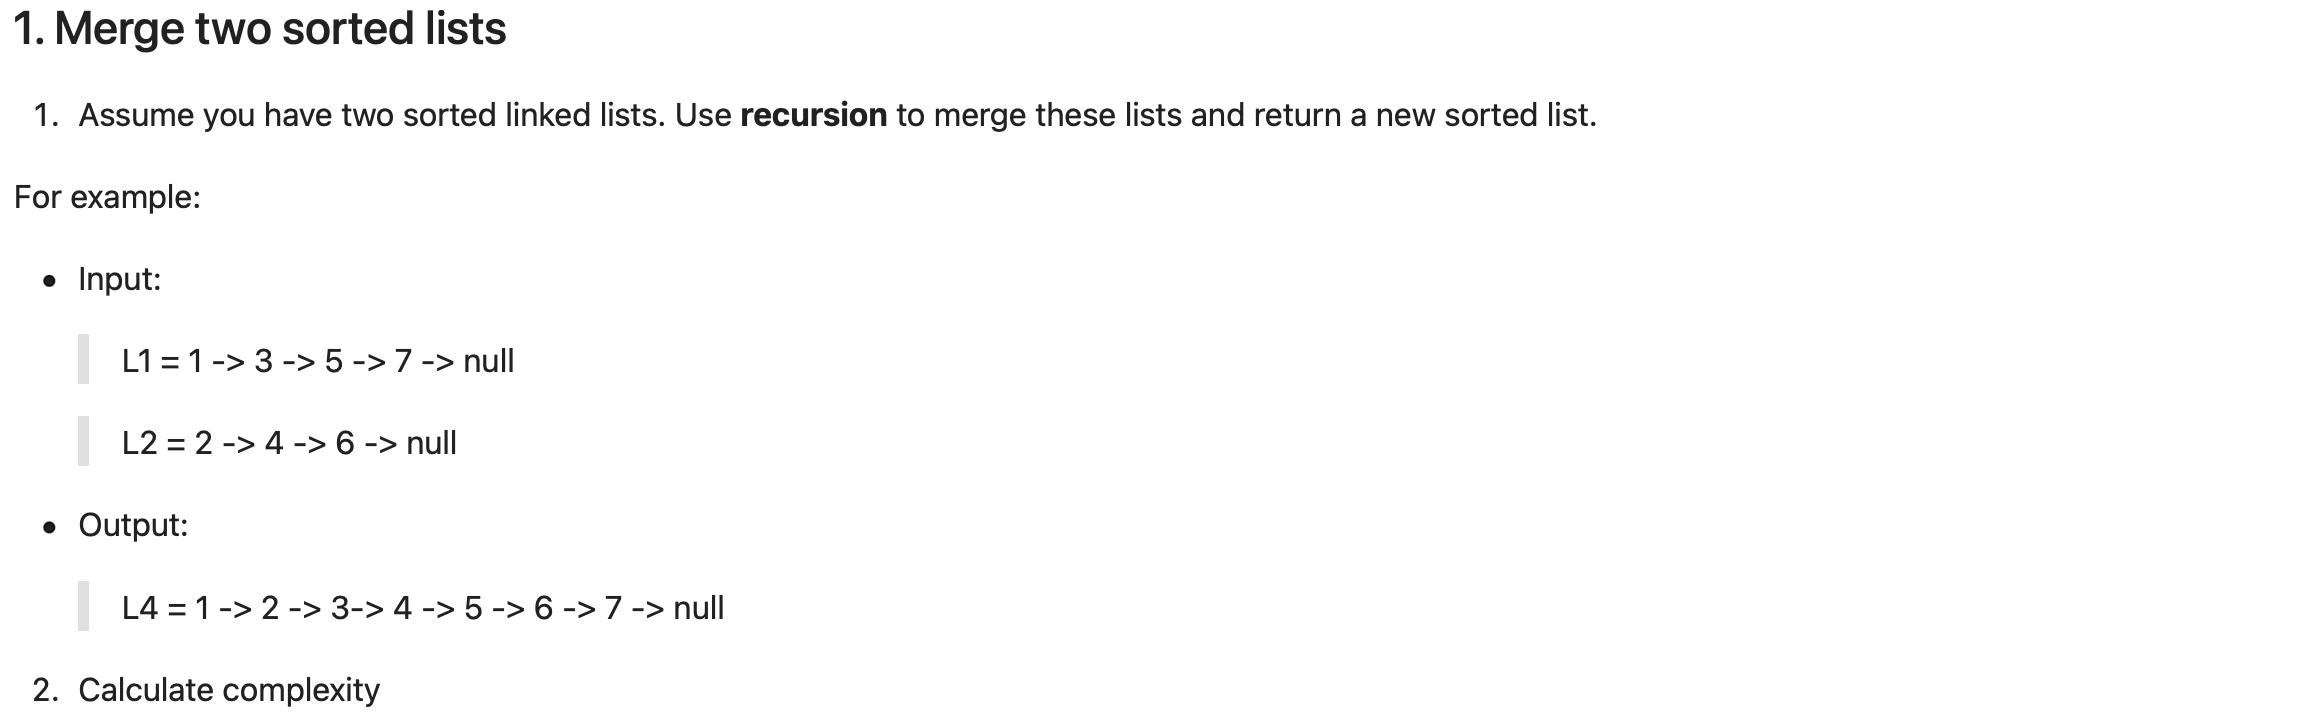

In [10]:
# Implementación de clase Node y Singly_linked_list (revisadas en clase y parte de deberes pasados)

class Node:
    def __init__(self, val = None):
        self.val = val
        self.next_node = None
        
    def set_next_node(self, next_node):
        self.next_node = next_node
        
class Singly_linked_list:
    def __init__(self, head_node = None):
        self.head_node = head_node
        
    def list_traversed(self):
        node = self.head_node
        print(node.val, end = '')
        while node:
            if node != self.head_node:
                print(' -> {}'.format(node.val), end = '')
            node = node.next_node
        print('\n')

In [9]:
# Función encargada de ordenar 2 listas 

def recursive_sort(list1_head, list2_head):
    # Se empieza con un Nodo vacío 
    temp = None
    
    # Dado que las listas están previamente ordenadas, si la lista1 se termina, entonces se añade a la lista
    # resultante todo el resto de la lista2 y viceversa
    if list1_head is None: 
        return list2_head
    elif list2_head is None:
        return list1_head
    
    # Se compara si el valor del head_node de la lista1 es menor o igual al valor del head_node de la lista2
    if list1_head.val <= list2_head.val:
        # Se almacena el nodo en una variable temporal
        temp = list1_head
        # Se hace recursión para continuar chequeando todos los valores de la lista
        temp.next_node = recursive_sort(list1_head.next_node, list2_head) 
    else:
        temp = list2_head
        temp.next_node = recursive_sort(list1_head, list2_head.next_node)
    
    # Se retorna el nodo temp, que está enlazado con los demás nodos ordenados
    return temp

In [11]:
# Creación del primer Linked-list (list1)
a1 = Node(1)
a2 = Node(3)
a3 = Node(5)
a4 = Node(7)

a1.set_next_node(a2)
a2.set_next_node(a3)
a3.set_next_node(a4)

list1 = Singly_linked_list(a1)

# Creación del segundo Linked-List (list2)

b1 = Node(2)
b2 = Node(4)
b3 = Node(6)

b1.set_next_node(b2)
b2.set_next_node(b3)

list2 = Singly_linked_list(b1)

print('Lista 1: ', end = ' ')
list1.list_traversed()
print('Lista 2: ', end = ' ')
list2.list_traversed()

sorted_list = Singly_linked_list(recursive_sort(list1.head_node, list2.head_node))

print('Lista resultante: ', end = ' ')
sorted_list.list_traversed()


Lista 1:  1 -> 3 -> 5 -> 7

Lista 2:  2 -> 4 -> 6

Lista resultante:  1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7



### 2: 
Dado que en el peor de los casos se deben recorrer las 2 listas enteras, y cada una tiene una longitud diferente, entonces se puede decir que la complejidad es de $O(m * n)$

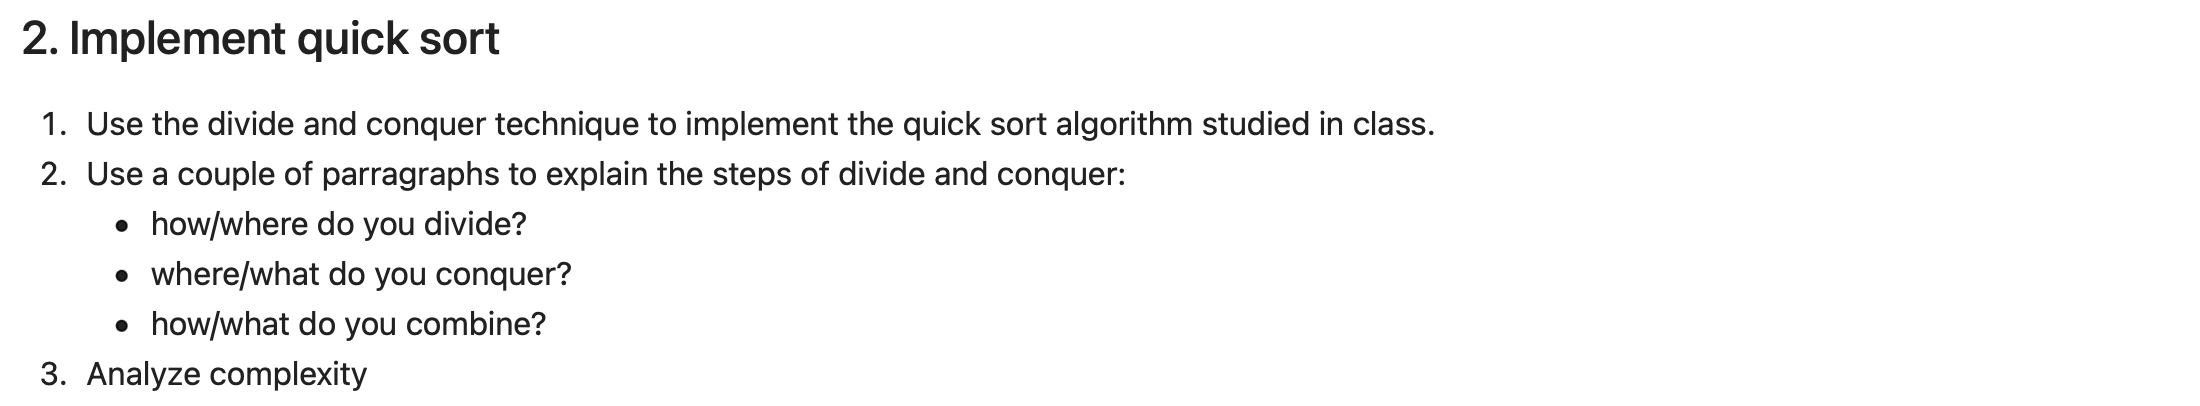

In [12]:
# Commented code
def quick_sort(lista):
    
    if len(lista) < 2:
        return lista
    
    
    
    # Cada vez que se dividen las listas, se realiza el 'conquer', pues dentro de este for loop se ordenan las listas en ...
    # ... números menores al primer término y números mayores al primer término. Eventualmente, solo van a haber 1 o 2 ...
    # ... elementos en la lista, y cada vez que esos términos (o sublistas) sean retornados, van a estar ordenados

    contador = 0 # Variable que nos permite conocer la ubicación del valor utilizado como 'pivot'
    for i in range(1, len(lista)): 
        # En caso de que el valor que se está visitando es mayor al pivot, entonces se ordena la lista en números menores y mayores al pivot 
        if lista[i] <= lista[0]:
            contador+= 1
            temp = lista[i]
            lista[i] = lista[contador]
            lista[contador] = temp
              
    # Como se conoce la posición del contador, entonces se lo devuelve al principio de la lista
    temp = lista[0]
    lista[0] = lista[contador] 
    lista[contador] = temp 
    
    # Este es el momento en el que se 'divide' el problema en subproblemas...
    # ... la lista que se está ordenando se divide en dos, una que incluye números a la izquierda del primer término (menores)...
    # ... y una que incluya números a la derecha del primer término (mayores)
    
    izq = quick_sort(lista[0:contador]) # Ordena elementos a la izquierda del valor pivot
    der = quick_sort(lista[contador+1:len(lista)]) # Ordena elementos a la derecha del valor pivot
    
    
    # En este momento se hace el 'combine', pues se añade toda la parte izquierda de la lista ordenada, el término que ...
    # ... separó inicialmente la lista, y la parte derecha de la lista ordenada recursivamente
    lista = izq + [lista[contador]] + der #Merging everything together
    
    return lista

In [13]:
import ctypes
from time import time

# Time wrapping function that will allow us to check the execution time of different functions
def temporizador(func):
    def wrap_function(*args, **kwargs):
        time1 = time()*10**6
        result = func(*args, **kwargs)
        time2 = time()*10**6
        return result, time2 - time1
    return wrap_function


# Clean code
@temporizador
def quick_sort(lista):
    
    if len(lista) < 2:
        return lista
    
    contador = 0 #Position of the partitioning element

    for i in range(1, len(lista)): #Partitioning loop
         if lista[i] <= lista[0]:
              contador += 1
              temp = lista[i]
              lista[i] = lista[contador]
              lista[contador] = temp
              
    temp = lista[0]
    lista[0] = lista[contador] 
    lista[contador] = temp #Brings pivot to it's appropriate position
    
    left = quick_sort(lista[0:contador])[0] #Sorts the elements to the left of pivot
    right = quick_sort(lista[contador+1:len(lista)])[0] #sorts the elements to the right of pivot

    lista = left + [lista[contador]] + right #Merging everything together
    
    return lista

Tiempos de ejecución:  [11.0, 30.0, 381.0, 6808.0, 269957.25]


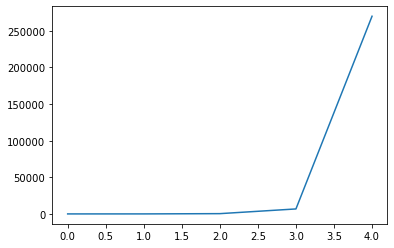

In [14]:
import random
from time import time
import matplotlib.pyplot as plt 

tiempos = []

i = 1

# Se realiza el test para 1, 10, 100, 1,000 y 10,000 elementos en la lista 
while i <= 10_000:
    lista = []
    j = 1
    for j in range(i + 1):
        lista.append(random.randint(1, 50))
    tiempos.append(quick_sort(lista)[1])
    i = i * 10

print('Tiempos de ejecución: ', tiempos)

plt.plot(tiempos)
plt.show()

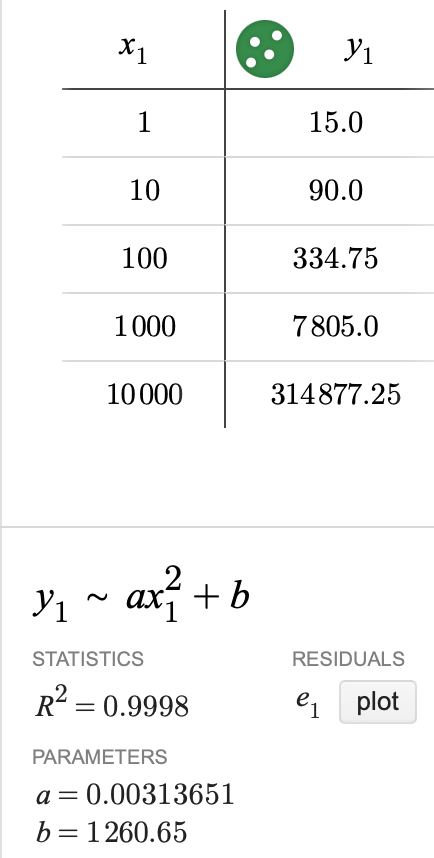

##### 3
Se observa que la complejidad de la función es $O(n^2)$, lo cual tiene sentido pues a cada lista se la debe dividir en 2, y luego ordenar cada una de esas sublistas

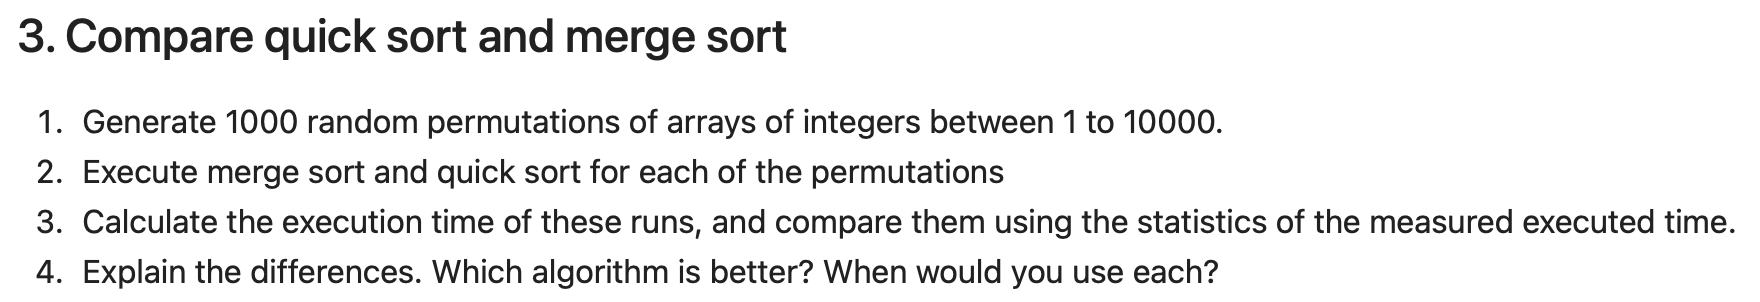

In [15]:
# Merge sort code (seen in class and adding the use of function 'temporizador')
@temporizador
def merge_sort(nums):
    if len(nums) <= 1:
        return nums
    pivot = int(len(nums) / 2)
    left = merge_sort(nums[0:pivot])
    right = merge_sort(nums[pivot:])

    return merge(left, right)

def merge(left1, right1):
    left = left1[0]
    right = right1[0]
    
    left_pointer = 0
    right_pointer = 0
    sorted_list = []
    while left_pointer < len(left) and right_pointer < len(right):
        if left[left_pointer] < right[right_pointer]:
            sorted_list.append(left[left_pointer])
            left_pointer += 1
        else:
            sorted_list.append(right[right_pointer])
            right_pointer += 1
    
    sorted_list.extend(left[left_pointer:])
    sorted_list.extend(right[right_pointer:])
    
    return sorted_list

In [16]:
# Quick sort code (same as the one done in the previous exercise)
@temporizador
def quick_sort(lista):
    
    if len(lista) < 2:
        return lista
    
    contador = 0 

    for i in range(1, len(lista)): 
         if lista[i] <= lista[0]:
              contador += 1
              temp = lista[i]
              lista[i] = lista[contador]
              lista[contador] = temp
              
    temp = lista[0]
    lista[0] = lista[contador] 
    lista[contador] = temp 
    
    left = quick_sort(lista[0:contador])[0] 
    right = quick_sort(lista[contador+1:len(lista)])[0] 

    lista = left + [lista[contador]] + right 
    
    return lista

In [17]:
# Ejemplo de las 2 funciones

lista = [4,5,8,9,2,0,1,3,10]
print('Lista original: ', lista)
print('Merge sort: {}\t\tTiempo: {}'.format(merge_sort(lista)[0], merge_sort(lista)[1])) # Se usa el primer término, pues la función devuelve la solución y el tiempo de ejecución
print('Quick sort: {}\t\tTiempo: {}'.format(quick_sort(lista)[0], quick_sort(lista)[1]))

Lista original:  [4, 5, 8, 9, 2, 0, 1, 3, 10]
Merge sort: [0, 1, 2, 3, 4, 5, 8, 9, 10]		Tiempo: 37.25
Quick sort: [0, 1, 2, 3, 4, 5, 8, 9, 10]		Tiempo: 21.75


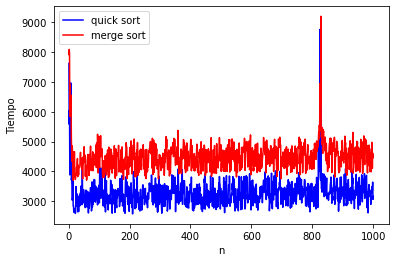

In [18]:
import random
import matplotlib.pyplot as plt 

# Función creada en Deber 1 para incluir 2 datasets en un gráfico
def plotting_2_functions(x, y1, y2, label1, label2):
    plt.plot(x, y1, c = 'b', label = label1)
    plt.plot(x, y2, c = 'r', label = label2)
    plt.legend(loc = 'upper left')
    plt.xlabel('n')
    plt.ylabel('Tiempo')
    plt.show()

tiempos_quick_sort = []
tiempos_merge_sort = []
valores = []
i = 1

while i <= 1_000: # Controla que se realicen 1,000 permutaciones de listas diferentes 
    lista = [] # Variable que almacena la lista ordenada
    for j in range(1000): # Se hacen listas con 1,000 elementos
        lista.append(random.randint(1, 10_000)) # Se añaden a la lista valores aleatorios del 1-10,000
    # Se añaden a las litas el tiempo que toma la ejecución de cada función
    tiempos_quick_sort.append(quick_sort(lista)[1]) 
    tiempos_merge_sort.append(merge_sort(lista)[1])
    valores.append(i) # Lista que toma en cuenta el número de ejecuciones que se están realizando (para que funcione de 'eje x' en el gráfico)
    i += 1

plotting_2_functions(valores, tiempos_quick_sort, tiempos_merge_sort, 'quick sort', 'merge sort') # Llamado a la función mencionada previamente que se creó en el Deber 1

#### 3.4
Se puede en el gráfico observar que el algoritomo 'quick sort' es mejor en términos de tiempo de ejecución en todos los casos. Esto se puede explicar al analizar el código de ambas funciones, pues la función 'merge sort' realiza el procesamiento de ordenar los datos en 2 tiempos. Primero divide la lista recurisvamente en la mitad hasta que ya no queden elementos, y posteriormente une todos los resultados. Además, en esta unión es cuando hace el ordenamiento de valores. 

En cambio, el algoritmo quick sort se encarga de ordenar la lista en números mayores y menores a un valor 'pivot', el cual es el primero de la lista. Los valores menores quedan a la izquierda del 'pivot', y los mayores a la derecha'. Esto se repite recursivamente hasta que toda la lista quede completamente ordenada. 

Considerando las explicaciones de los 2 métodos utilizandos, el método quick sort resulta ser más amigable, pues realiza todo el ordenamiento de datos en un solo tiempo. Divide las listas en la mitad hasta que queden listas de 1 elemento, y en ese momento las une para generar la lista original ordenada. Se evidencia que este método, más dependiente de la recursión, es más eficiente que el método de merge_sort.

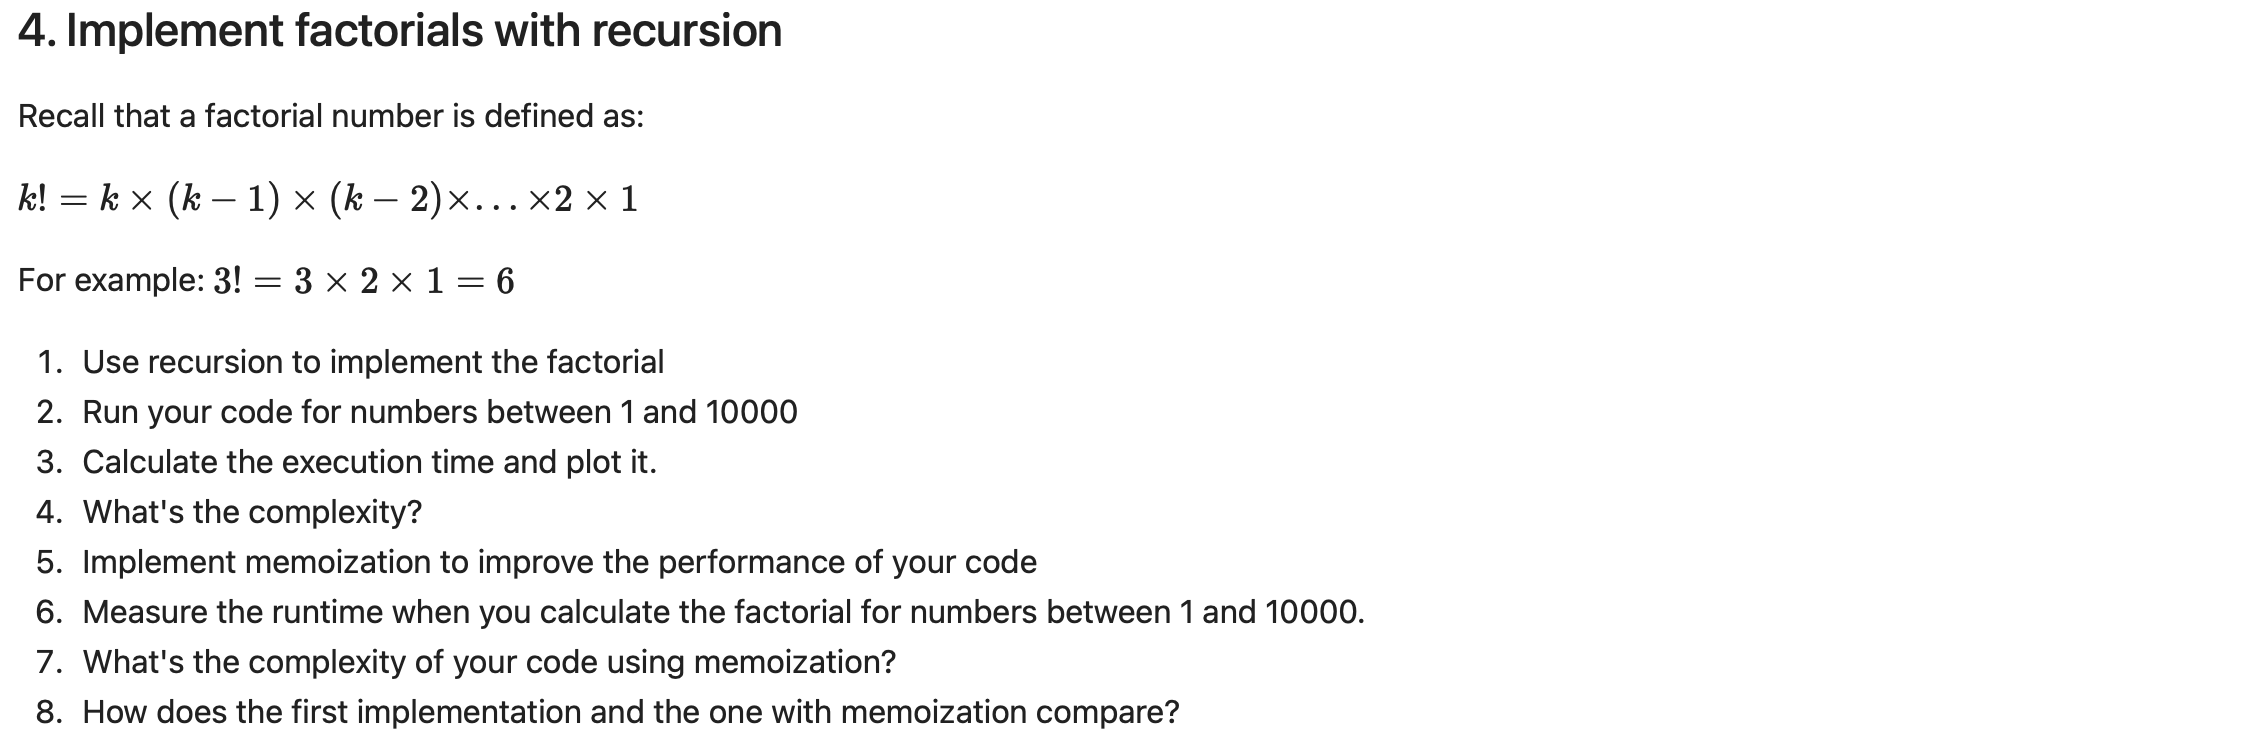

In [51]:
from time import time

def temporizador(func):
    def wrap_function(*args, **kwargs):
        time1 = time()*10**6
        result = func(*args, **kwargs)
        time2 = time()*10**6
        return result, time2 - time1
    return wrap_function

@temporizador
def recursive_factorial(numero):
    if numero <= 1:
        return numero
    else:
        return numero * recursive_factorial(numero - 1)[0]
    
print('Ejemplo de factorial recursivo: ', recursive_factorial(10))

Ejemplo de factorial recursivo:  (3628800, 15.0)


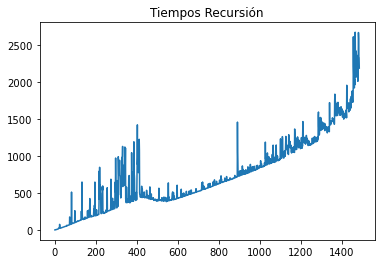

In [57]:
tiempos_recursive_factorial = []

for i in range(1_485): # Únicamente se puede realizar la llamada recursiva para el 1,485, pues cualquier número mayor a 
                       # ... envía el error de 'máximas llamadas recursivas permitidas'
    tiempos_recursive_factorial.append(recursive_factorial(i + 1)[1])

plt.plot(tiempos_recursive_factorial)
plt.title("Tiempos Recursión")
plt.show()

### 4

El caso base del algoritmo sucede cuando el número que recibe la función es 1. Además, en las llamadas recursivas, la función siempre recibe el número - 1 (n - 1), hasta que se llegue al caso base. Esto ya es un claro indicio de que la función se va a llamar a sí misma un número n de veces. En otras palabras, la complejidad es $O(n)$

In [58]:
# Factorial using recursion

@temporizador
def memoization_factorial(numero):
    producto = 1
    
    while numero > 1:
        producto *= numero
        numero -= 1
    return producto
        
print('Prueba factorial con memoization de 10: ', memoization_factorial(10)[0])

Prueba factorial con memoization de 10:  3628800


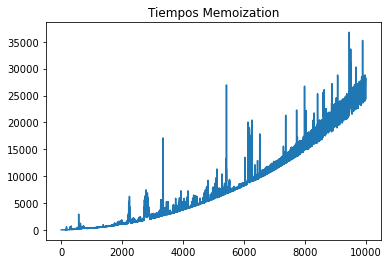

In [44]:
tiempos_memoization = []

for i in range(10_000):
    tiempos_memoization.append(memoization_factorial(i + 1)[1])
    
plt.plot(range(10_000), tiempos_memoization, label = "memoization")
plt.title("Tiempos Memoization")
#plt.plot(range(1485), tiempos_recursive_factorial, label = "recursive")
#plt.legend(loc="upper left")
plt.show()

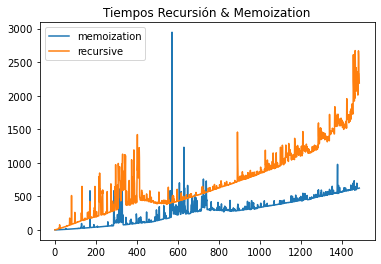

In [59]:
# Comparación de tiempos recursión vs memoization

plt.plot(range(1485), tiempos_memoization[:1485], label = "memoization")
plt.plot(range(1485), tiempos_recursive_factorial, label = "recursive")
plt.title("Tiempos Recursión & Memoization")
plt.legend(loc="upper left")
plt.show()

Al graficar el rendimiento de ambas funciones, se observa que el método que utiliza memoization tiene un mejor rendimiento en términos de tiempo que el recursivo. Esto es interesante, dado que, aunque el método recursivo no utiliza memoria, el método de memoization utiliza $O(1)$ de memoria, pues solo almacena el valor acumulador del resultado y del número, al que se le va restando 1 para calcular el factorial. 